In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
%matplotlib inline

In [2]:
dataset=pd.read_csv('Live.csv')

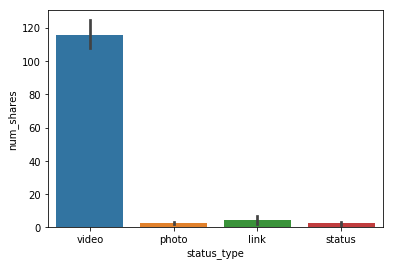

In [3]:
sns.barplot(x='status_type',y='num_shares',data=dataset)

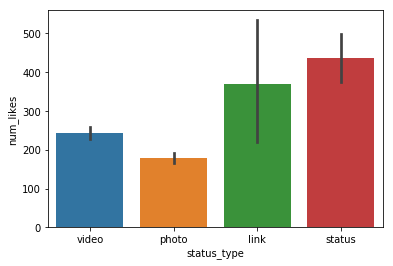

In [4]:
sns.barplot(x='status_type',y='num_likes',data=dataset)

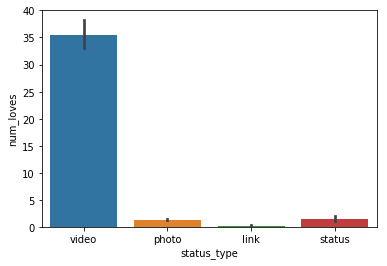

In [5]:
sns.barplot(x='status_type',y='num_loves',data=dataset)

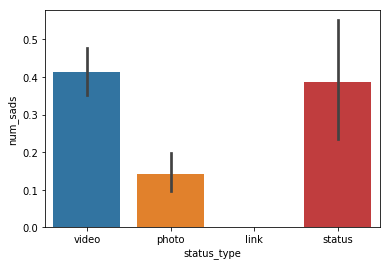

In [6]:
sns.barplot(x='status_type',y='num_sads',data=dataset)

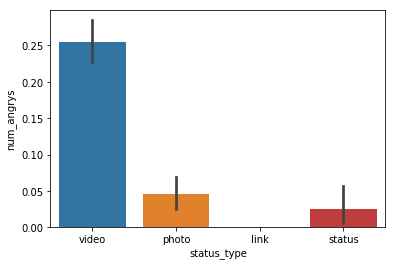

In [7]:
sns.barplot(x='status_type',y='num_angrys',data=dataset)

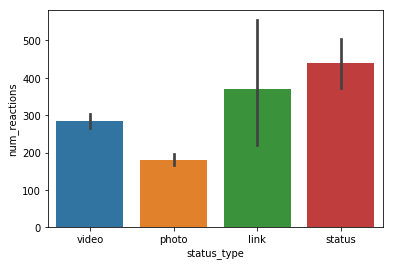

In [8]:
sns.barplot(x='status_type',y='num_reactions',data=dataset)

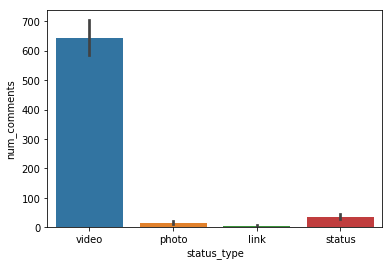

In [9]:
sns.barplot(x='status_type',y='num_comments',data=dataset)

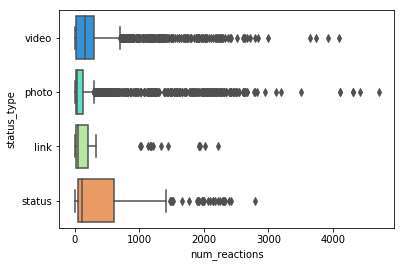

In [10]:
sns.boxplot(x="num_reactions", y="status_type", data=dataset,palette='rainbow')

Text(0.5,1,'correlations')

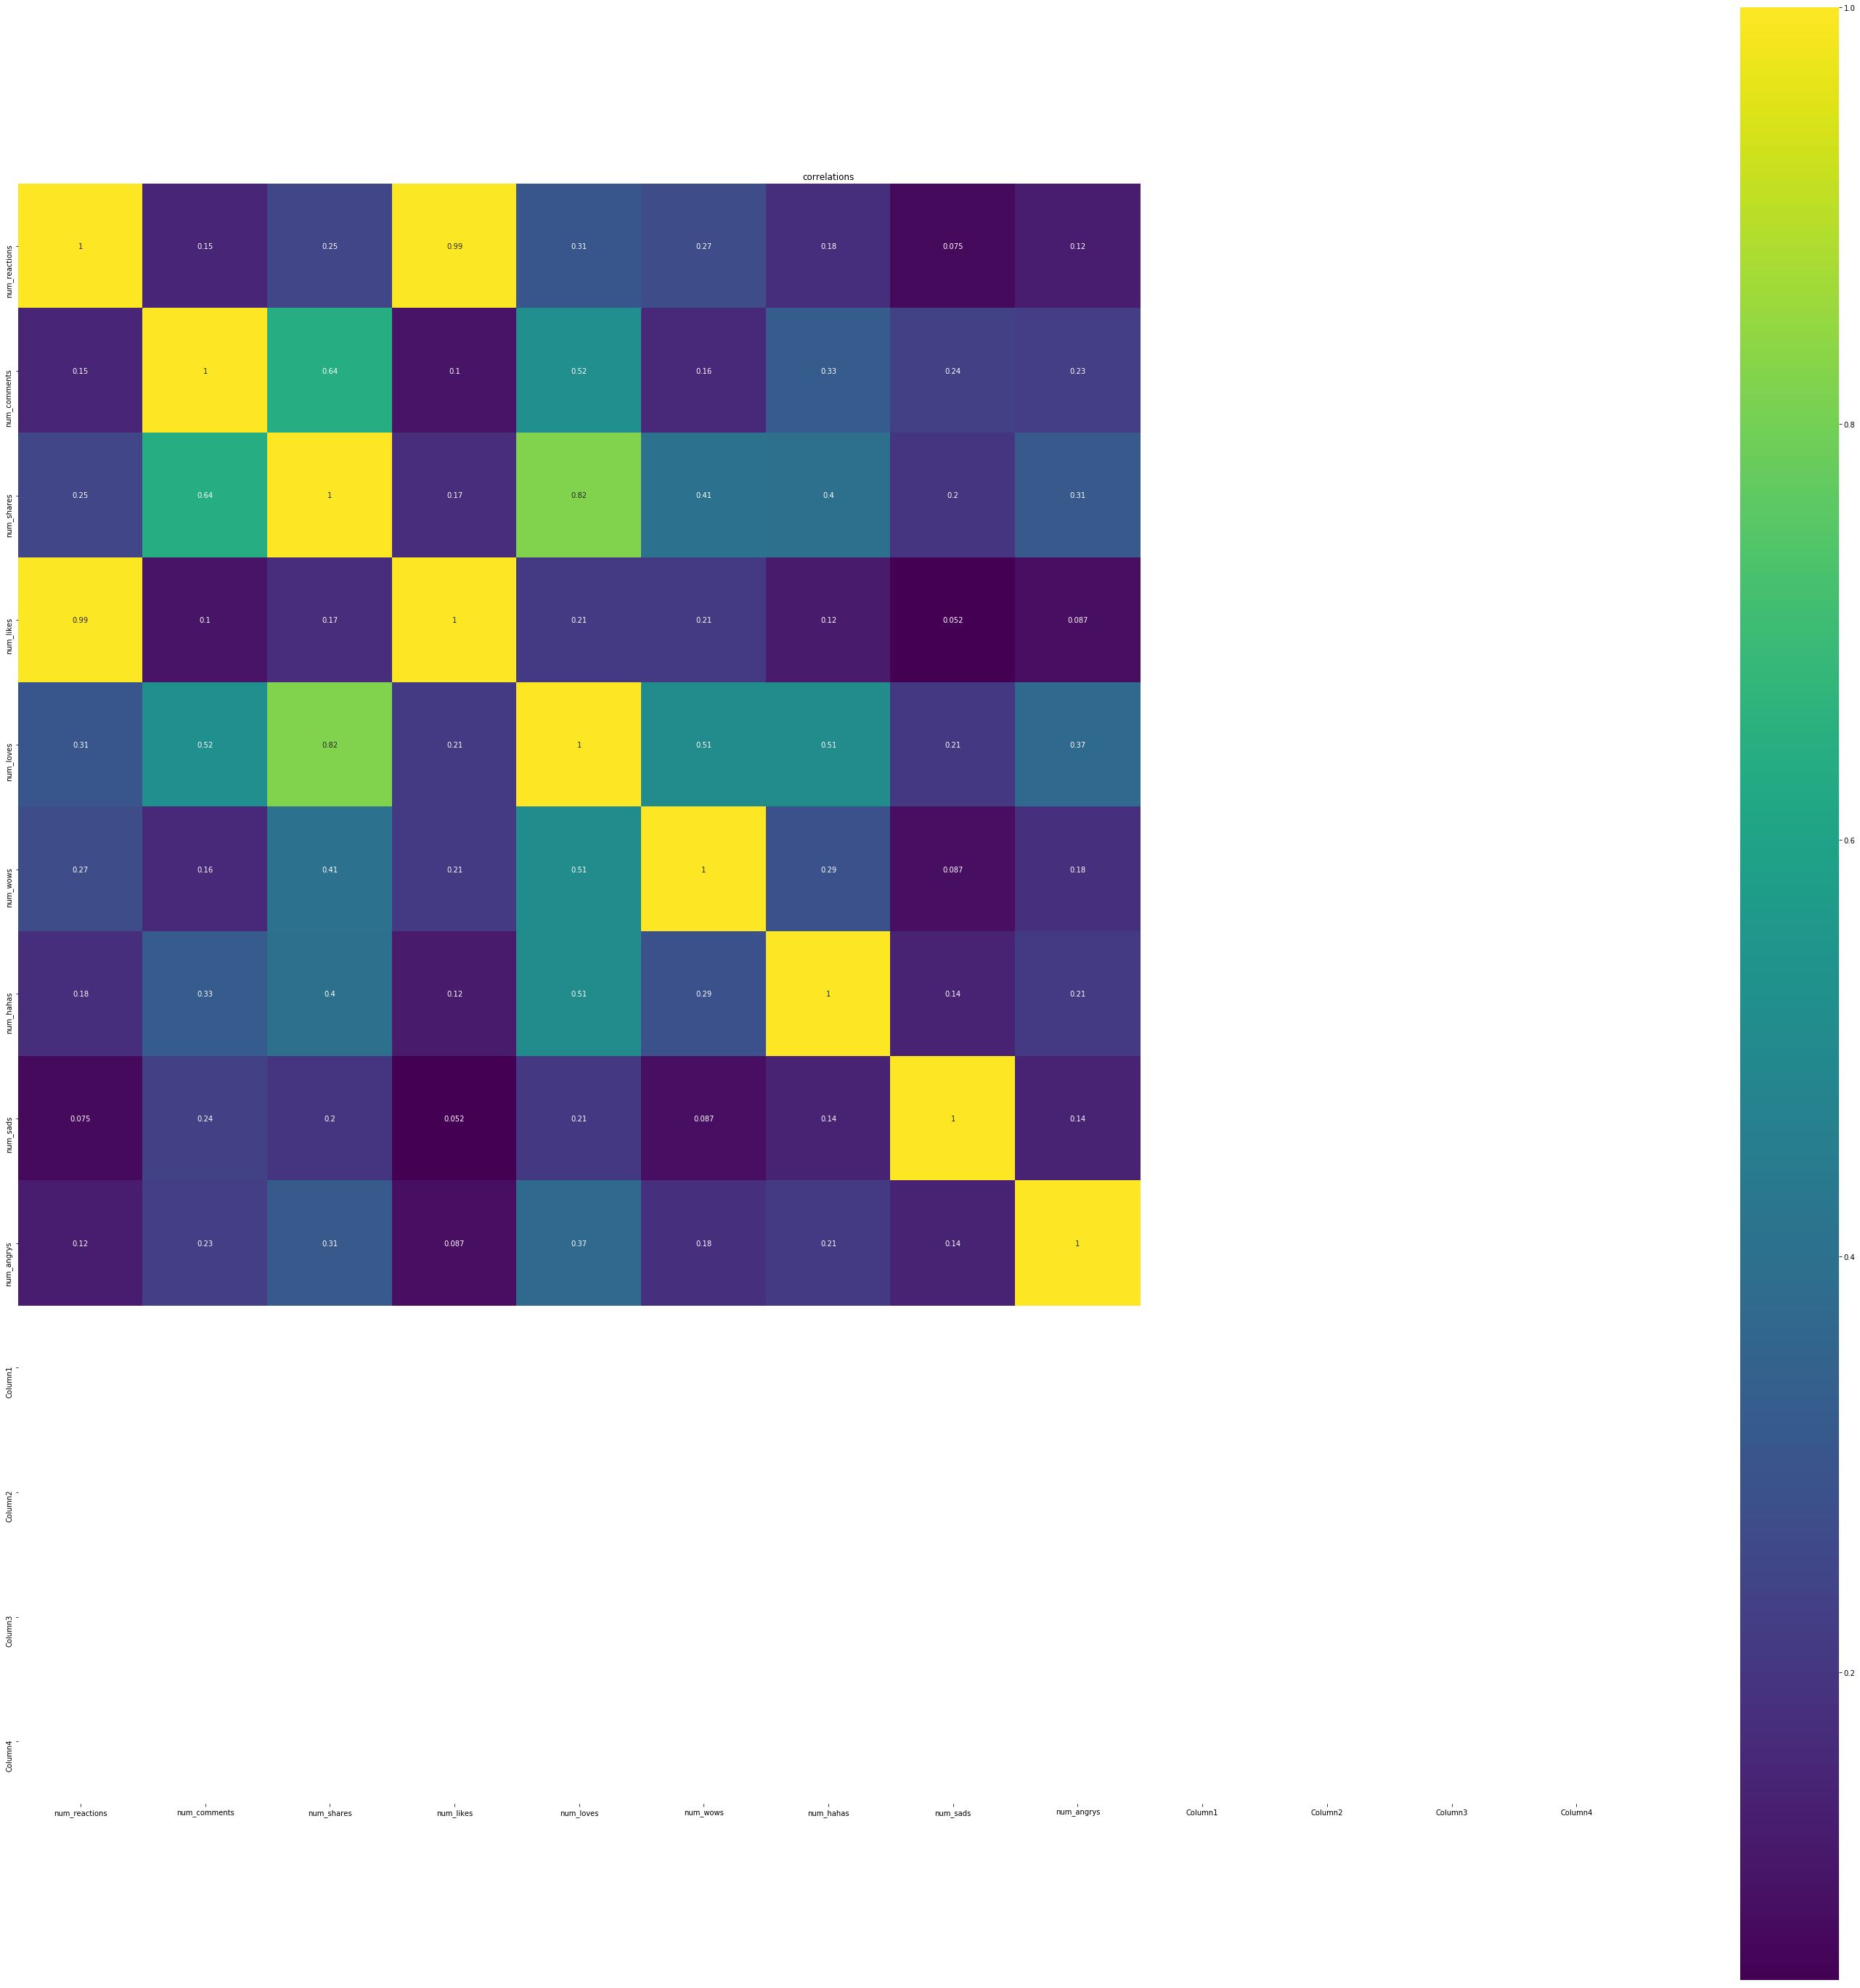

In [11]:
correlation = dataset.corr()
plt.figure(figsize=(50, 50))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('correlations')

In [12]:
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [13]:
new_live= dataset.drop( ['Column1', 'Column2' , 'Column3', 'Column4', 'status_id', 'status_published'], axis=1)

In [14]:
new_live.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [15]:
new_live.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [16]:
live_ratios=pd.read_csv('live_ratios.csv')

In [17]:
live_ratios.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,527,1,0.001897533,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,150,0,0,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,226,0,0,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,111,0,0,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,213,0,0,NaN


In [18]:
new_rations=live_ratios.drop( [ 'Column4', 'status_id', 'status_published'], axis=1)

In [19]:
new_rations.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3
0,video,529,512,262,432,92,3,1,1,0,527,1,0.001897533
1,photo,150,0,0,150,0,0,0,0,0,150,0,0
2,video,227,236,57,204,21,1,1,0,0,226,0,0
3,photo,111,0,0,111,0,0,0,0,0,111,0,0
4,photo,213,0,0,204,9,0,0,0,0,213,0,0


In [20]:
new_rations.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,229.061135,0.356879
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,461.740130,1.846350
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,217.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,4710.000000,51.000000


In [21]:
newer_live= dataset.drop( ['num_wows', 'num_sads' , 'num_angrys', 'num_hahas', 'Column1', 'Column2' , 'Column3', 'Column4', 'status_id', 'status_published'], axis=1)

In [22]:
newer_live.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves
0,video,529,512,262,432,92
1,photo,150,0,0,150,0
2,video,227,236,57,204,21
3,photo,111,0,0,111,0
4,photo,213,0,0,204,9


In [23]:
newer_live

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves
0,video,529,512,262,432,92
1,photo,150,0,0,150,0
2,video,227,236,57,204,21
3,photo,111,0,0,111,0
4,photo,213,0,0,204,9
5,photo,217,6,0,211,5
6,video,503,614,72,418,70
7,video,295,453,53,260,32
8,photo,203,1,0,198,5
9,photo,170,9,1,167,3


In [24]:
newer_live.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652
std,462.625309,889.636820,131.599965,449.472357,39.972930
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000


Text(0.5,1,'correlations')

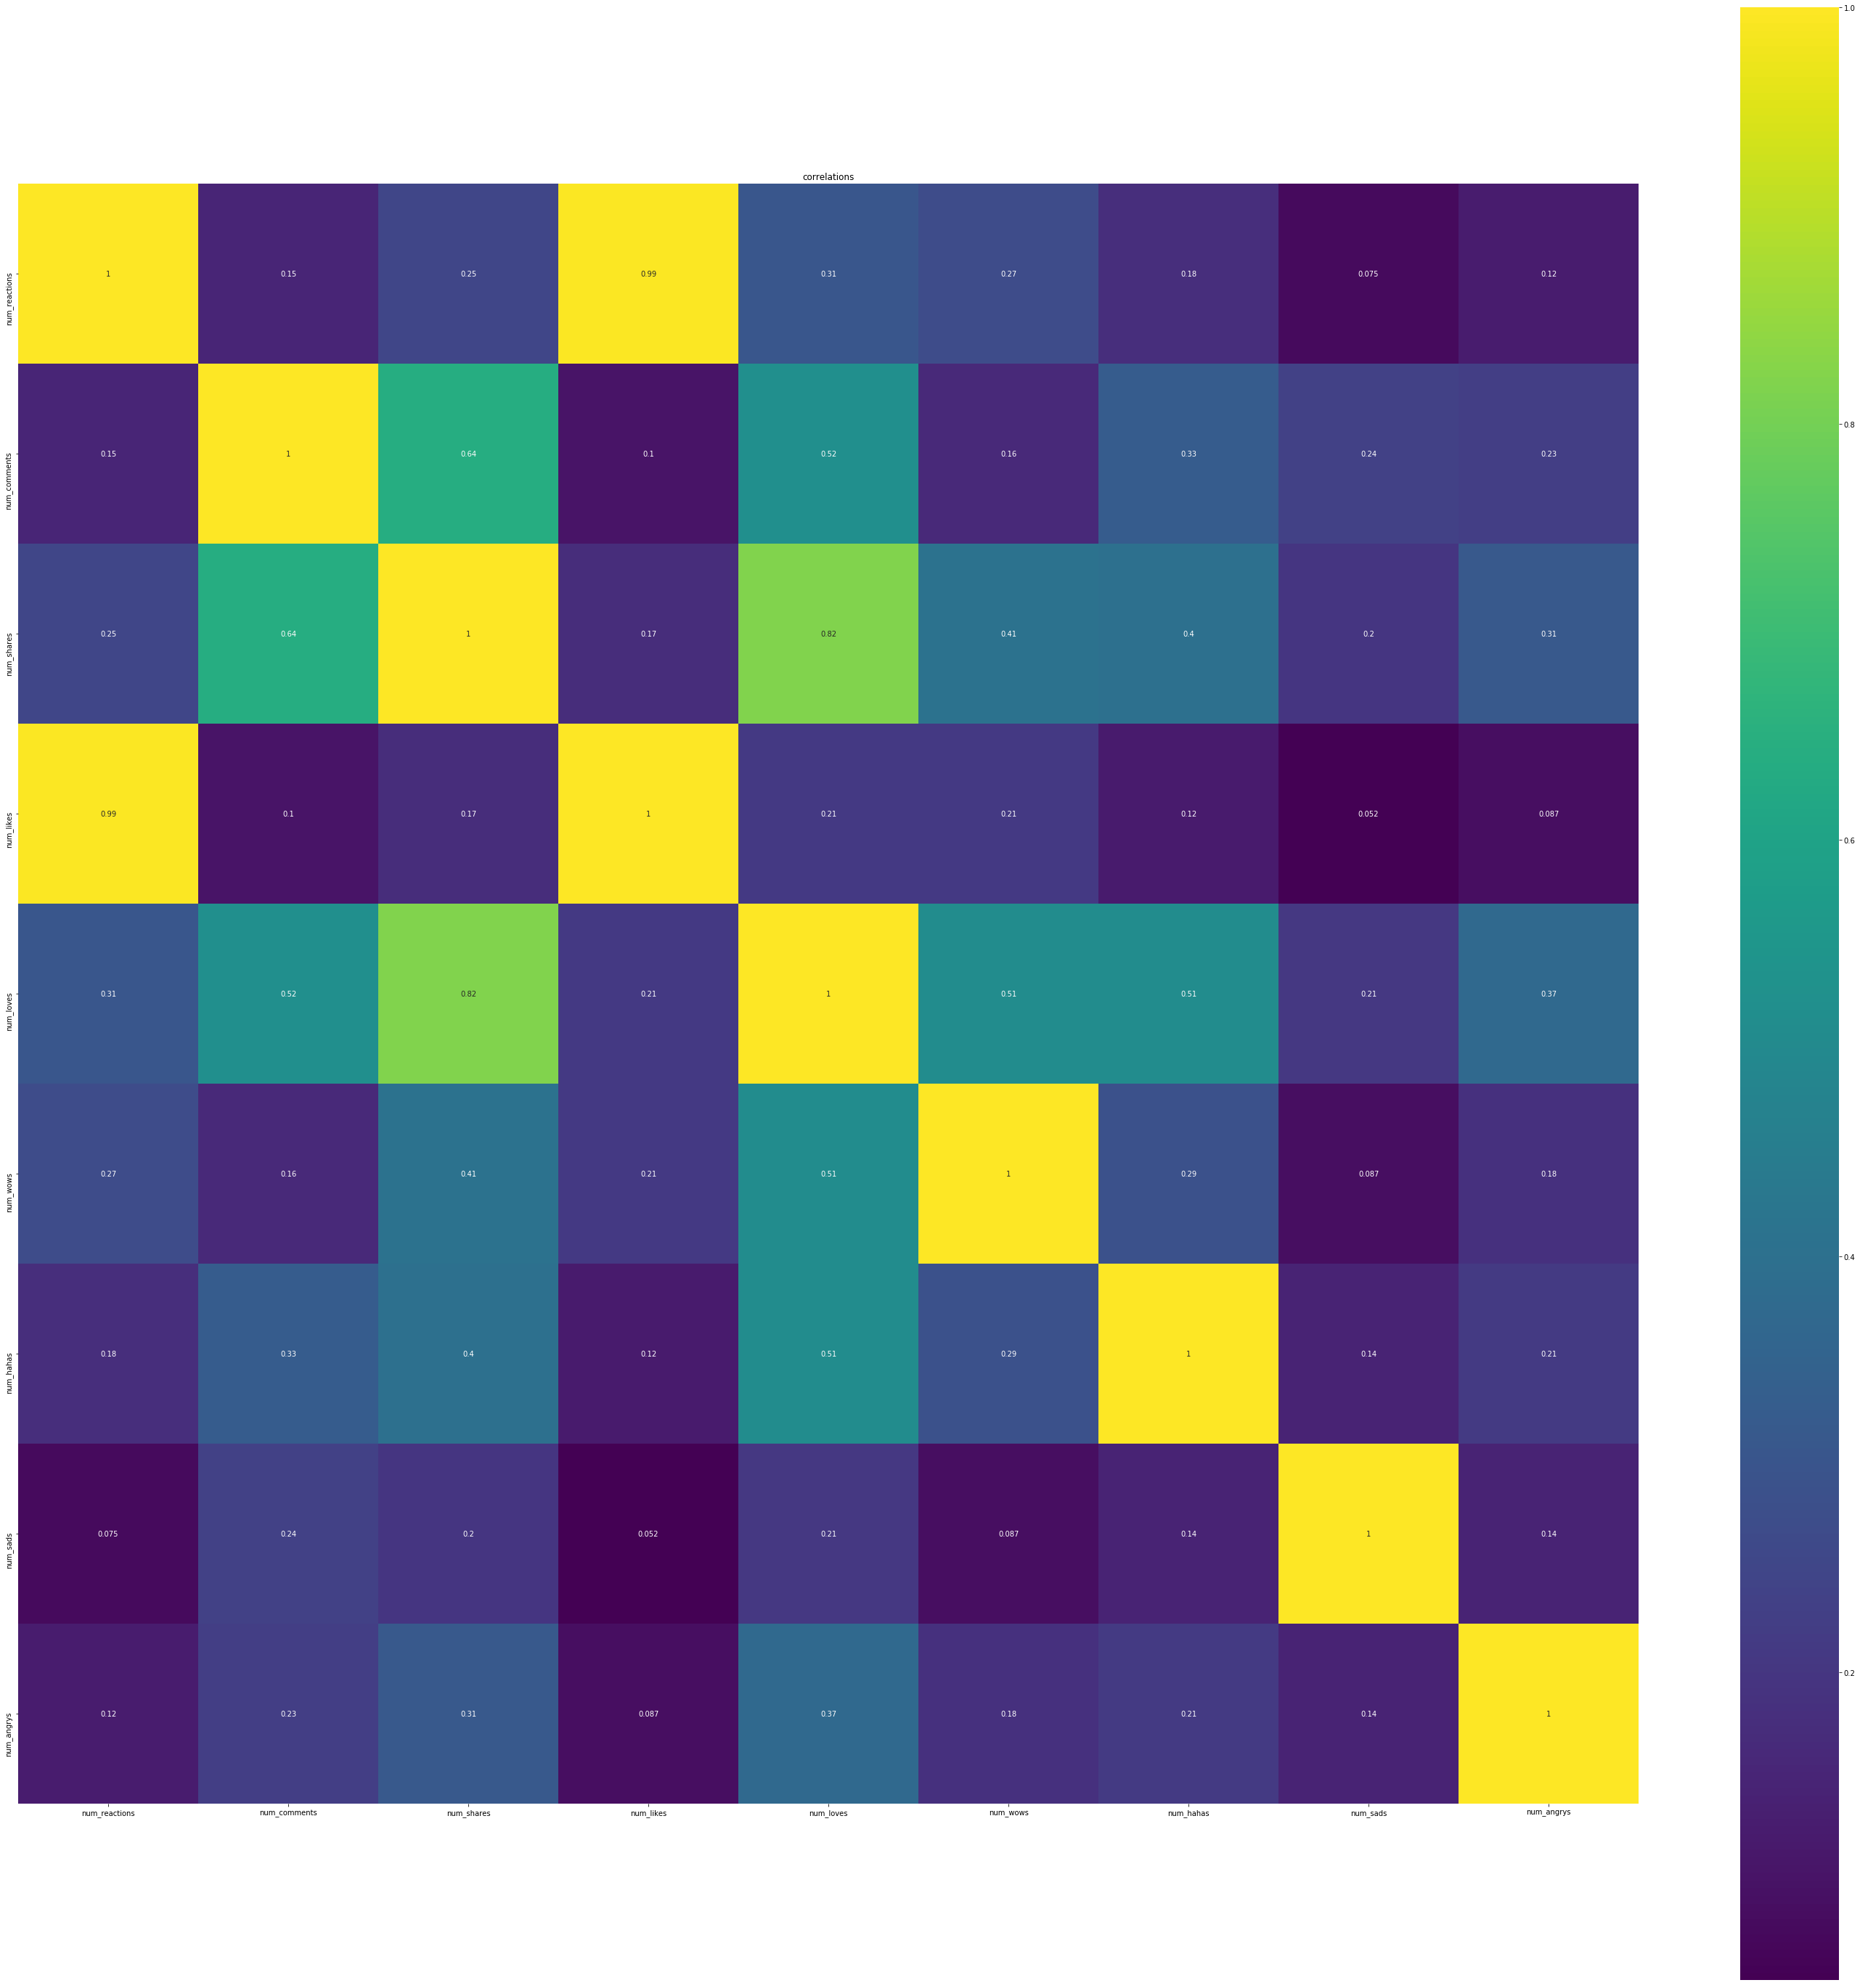

In [25]:
correlation =new_live.corr()
plt.figure(figsize=(50, 50))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('correlations')

Text(0.5,1,'correlations')

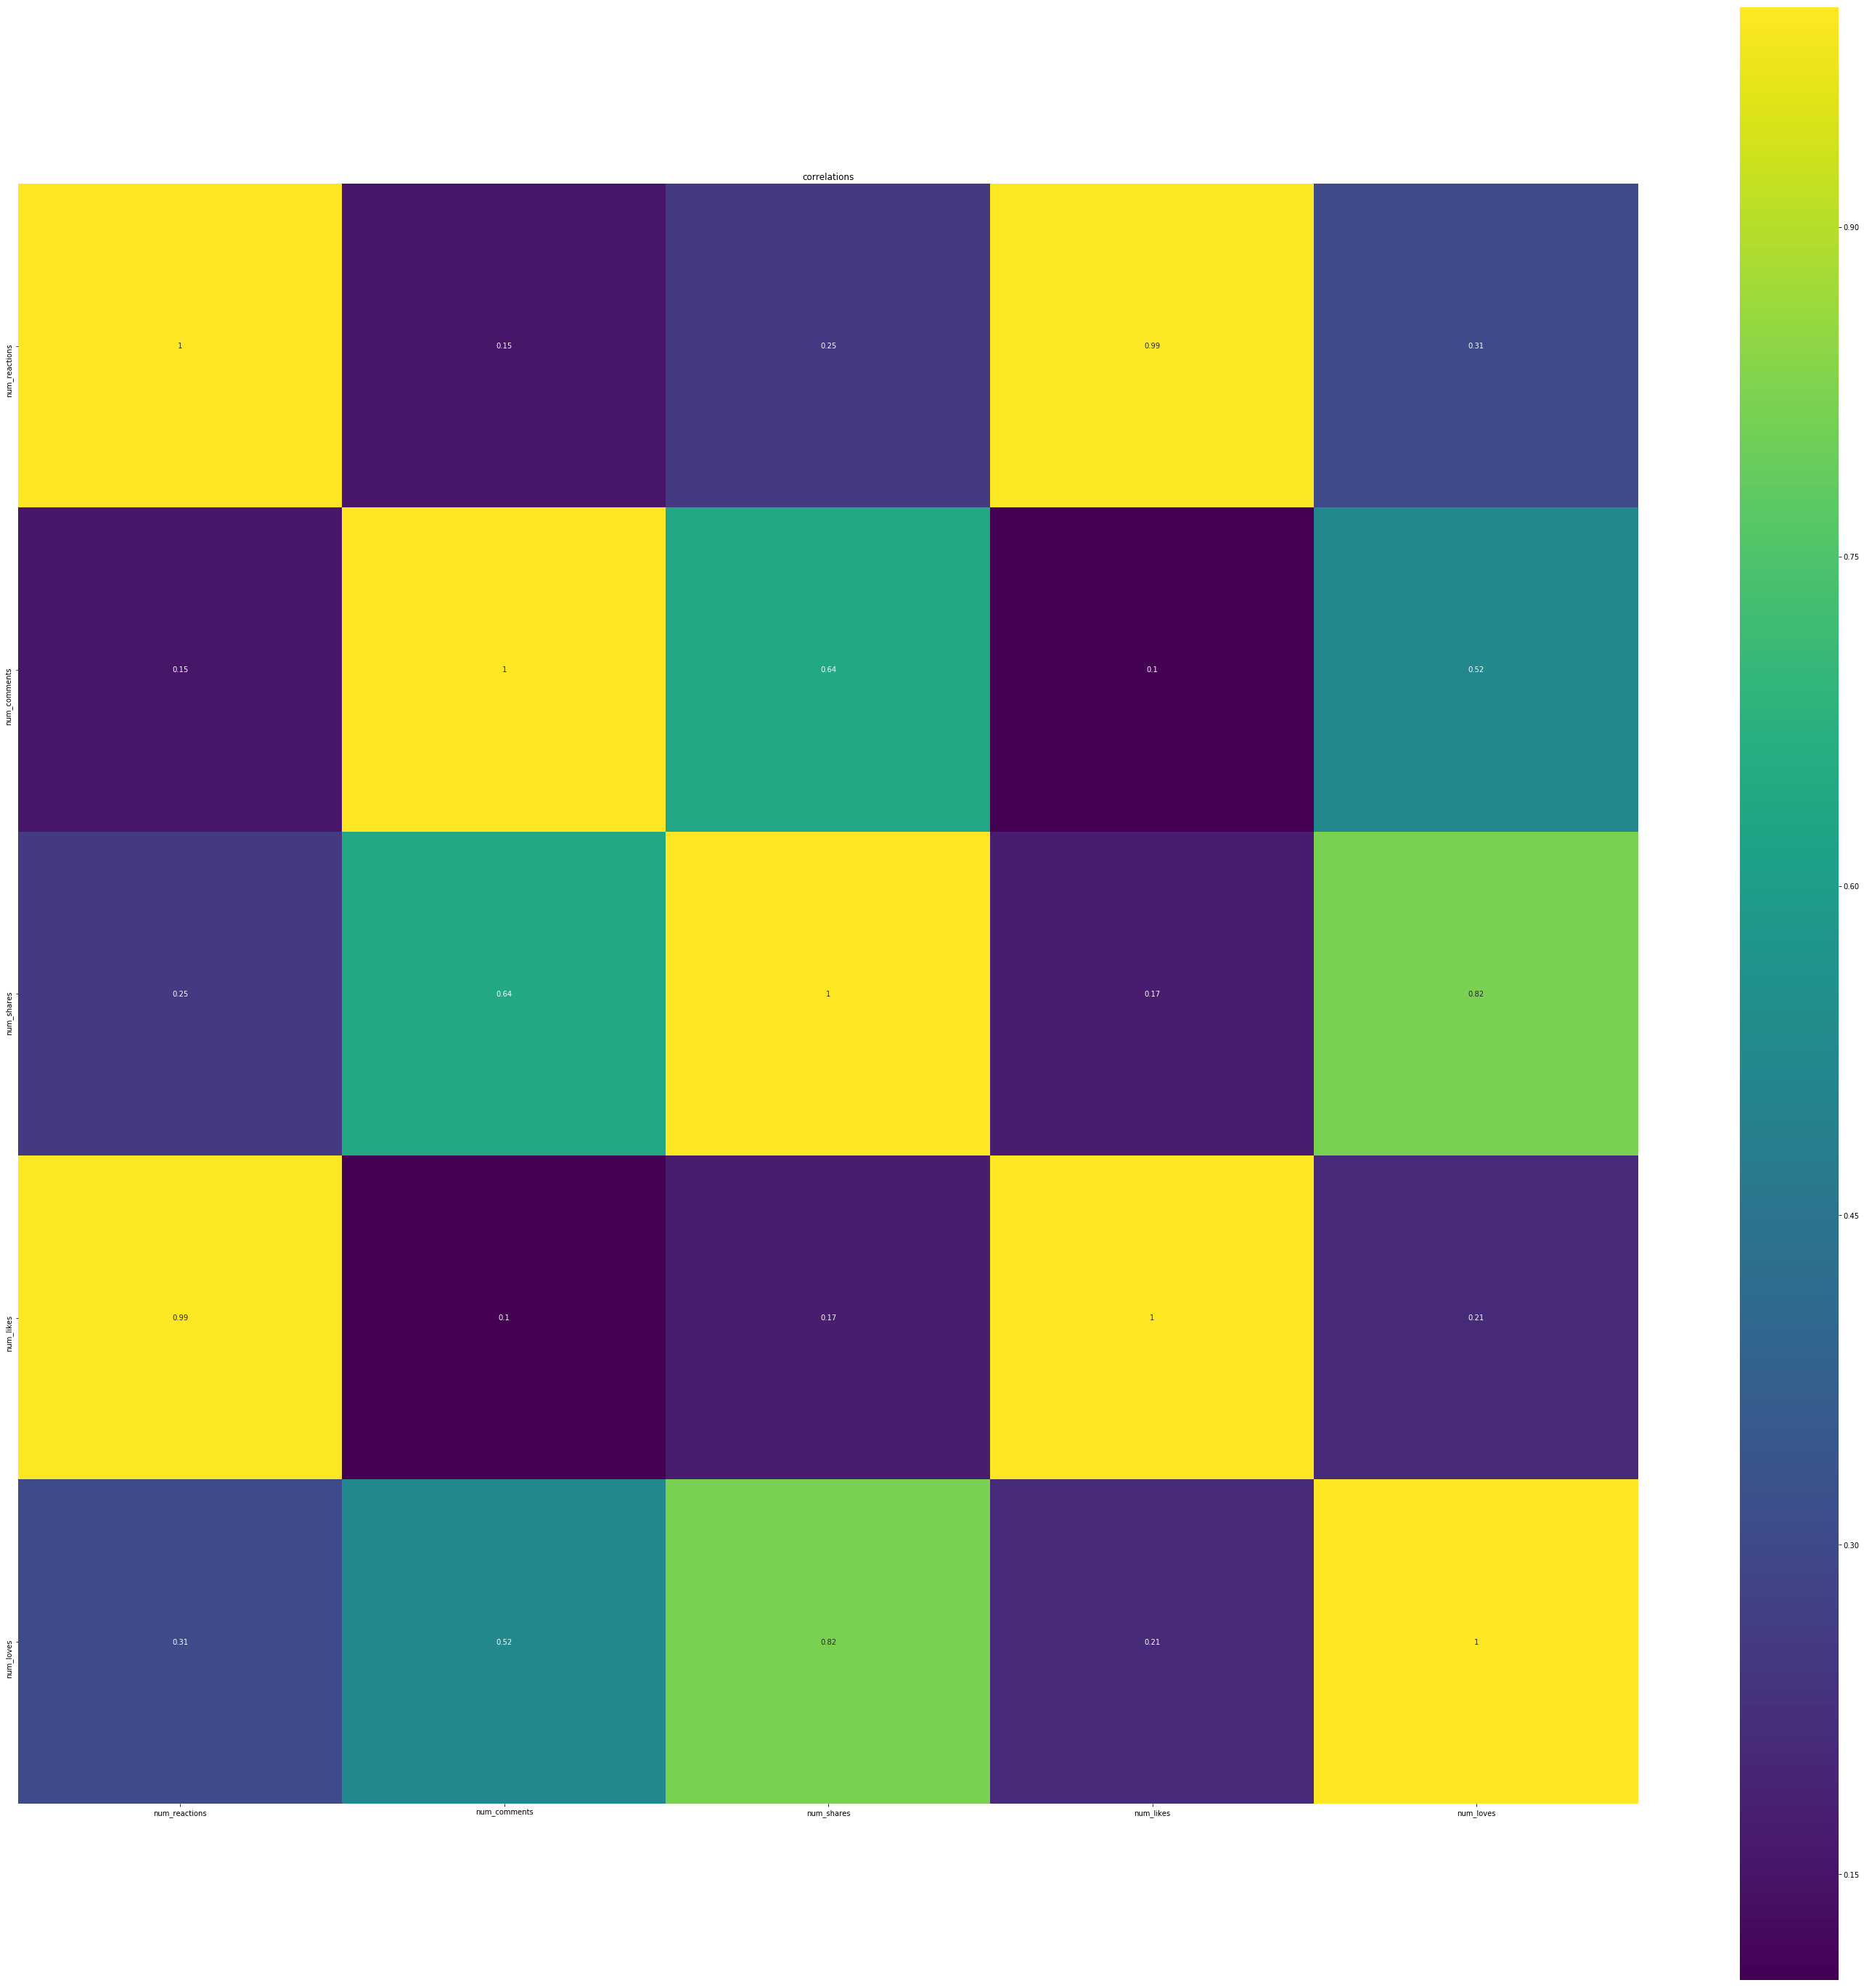

In [26]:
correlation =newer_live.corr()
plt.figure(figsize=(50, 50))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('correlations')

In [28]:
prep=pd.read_csv('prep_live.csv')

In [29]:
prep.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,x1,x2,x3,x4
0,video,529,512,262,432,264.5,64.0,32.750,54.000
1,photo,150,0,0,150,75.0,0.0,0.000,18.750
2,video,227,236,57,204,113.5,29.5,7.125,25.500
3,photo,111,0,0,111,55.5,0.0,0.000,13.875
4,photo,213,0,0,204,106.5,0.0,0.000,25.500


In [34]:
prep['status_type'][prep.status_type == 'video'] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
prep.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,x1,x2,x3,x4
0,1,529,512,262,432,264.5,64.0,32.750,54.000
1,photo,150,0,0,150,75.0,0.0,0.000,18.750
2,1,227,236,57,204,113.5,29.5,7.125,25.500
3,photo,111,0,0,111,55.5,0.0,0.000,13.875
4,photo,213,0,0,204,106.5,0.0,0.000,25.500


In [36]:
prep['status_type'][prep.status_type == 'photo'] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
prep['status_type'][prep.status_type == 'link'] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
prep['status_type'][prep.status_type == 'status'] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
prep.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,x1,x2,x3,x4
0,1,529,512,262,432,264.5,64.0,32.750,54.000
1,0,150,0,0,150,75.0,0.0,0.000,18.750
2,1,227,236,57,204,113.5,29.5,7.125,25.500
3,0,111,0,0,111,55.5,0.0,0.000,13.875
4,0,213,0,0,204,106.5,0.0,0.000,25.500


In [45]:
X=prep.iloc[:,1:7].values
y=prep.iloc[:,0].values

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [47]:
X_train

array([[  3.19000000e+03,   1.90000000e+01,   1.00000000e+00,
          3.19000000e+03,   1.59500000e+03,   2.37500000e+00],
       [  1.00000000e+01,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+01,   5.00000000e+00,   0.00000000e+00],
       [  3.70000000e+01,   0.00000000e+00,   2.00000000e+00,
          3.50000000e+01,   1.85000000e+01,   0.00000000e+00],
       ..., 
       [  1.15000000e+02,   9.00000000e+00,   0.00000000e+00,
          1.15000000e+02,   5.75000000e+01,   1.12500000e+00],
       [  2.50000000e+01,   9.00000000e+00,   0.00000000e+00,
          2.50000000e+01,   1.25000000e+01,   1.12500000e+00],
       [  1.74000000e+02,   6.60000000e+01,   1.00000000e+00,
          1.73000000e+02,   8.70000000e+01,   8.25000000e+00]])

In [48]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [49]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()

In [50]:
y_train =labelencoder_y.fit_transform(y_train)

In [51]:
y_test =labelencoder_y.fit_transform(y_test)

In [52]:
y_test

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
print ('The Decision Tree')
dt = DecisionTreeClassifier()
clf_dt = dt.fit(X_train,y_train)
print('Training Accuracy: ',clf_dt.score(X_train,y_train)*100)
print ('Testing Accuracy: ',clf_dt.score(X_test,y_test)*100)

The Decision Tree
Training Accuracy:  93.9412360689
Testing Accuracy:  83.1678486998


In [55]:
from sklearn.svm import SVC

In [56]:
model = SVC()

In [57]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
print("SVC MODEL")
print('Training Accuracy',model.score(X_train,y_train)*100)
print('Testing Accuracy',model.score(X_test,y_test)*100)

SVC MODEL
Training Accuracy 92.4822695035
Testing Accuracy 68.841607565


In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lgmodel = LogisticRegression()
lgmodel.fit(X_train,y_train)
print("Logistic Regression MODEL")
print('Training Accuracy',lgmodel.score(X_train,y_train)*100)
print('Testing Accuracy',lgmodel.score(X_test,y_test)*100)

Logistic Regression MODEL
Training Accuracy 80.6281661601
Testing Accuracy 80.9929078014


In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
KNC=KNeighborsClassifier()
KNC.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [70]:
print("KNeighborsClassifier")
print('Training Accuracy',KNC.score(X_train,y_train)*100)
print('Testing Accuracy',KNC.score(X_test,y_test)*100)

KNeighborsClassifier
Training Accuracy 85.7750759878
Testing Accuracy 84.0661938534
